<a href="https://colab.research.google.com/github/linneverh/Data-project-/blob/main/pogingen1_Linne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data
df_green = pd.read_csv('/content/new_tree_europe_cities(in).csv')

In [2]:
# Dataset Overview
df_green.head() # preview a sample

,City name,City code,FUA name,Area in km2,Tree cover [%],Tree cover [km2]
0,Oulu / Uleåborg,FI004C3,Oulu,3156,77.54,2447
1,Kuopio,FI008C3,Kuopio,3737,64.19,2399
2,Umeå,SE005C1,Umeå,2391,81.71,1953
3,Uppsala,SE006C1,Uppsala,2248,66.77,1501
4,Jönköping,SE004C1,Jönköping,1937,57.90,1122


In [3]:
df_green.shape  # number of observations and features (988,6)


(988, 6)

In [4]:
df_green.dtypes

,0
City name,object
City code,object
FUA name,object
Area in km2,int64
Tree cover [%],float64
Tree cover [km2],int64


In [5]:
df_green.isna().sum()

,0
City name,0
City code,0
FUA name,0
Area in km2,0
Tree cover [%],0
Tree cover [km2],0


In [6]:
df_green.describe()

,Area in km2,Tree cover [%],Tree cover [km2]
count,988.000000,988.000000,988.000000
mean,161.074899,28.528664,55.752024
std,288.557606,15.883360,163.782210
min,2.000000,1.420000,0.000000
25%,43.000000,16.225000,9.000000
50%,86.000000,24.820000,23.000000
75%,165.000000,38.785000,49.000000
max,3737.000000,83.870000,2447.000000


In [30]:
# prompt: show me which city has min & max tree cover [%]

# Find the city with the minimum tree cover percentage
min_tree_cover_city = df_green.loc[df_green['Tree cover [%]'].idxmin()]

# Find the city with the maximum tree cover percentage
max_tree_cover_city = df_green.loc[df_green['Tree cover [%]'].idxmax()]

print("City with minimum tree cover percentage:")
print(min_tree_cover_city)

print("\nCity with maximum tree cover percentage:")
print(max_tree_cover_city)


City with minimum tree cover percentage:
City name           City of London
City code                  UK101C1
FUA name                    London
Area in km2                      3
Tree cover [%]                1.42
Tree cover [km2]                 0
Name: 987, dtype: object

City with maximum tree cover percentage:
City name            Savona
City code           IT052C1
FUA name             Savona
Area in km2              65
Tree cover [%]        83.87
Tree cover [km2]         55
Name: 217, dtype: object


DISTRIBUTION

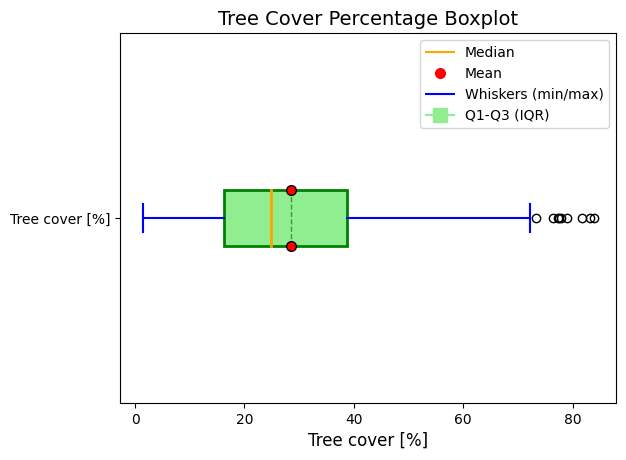

In [13]:
#boxplot
import matplotlib.pyplot as plt

# Create a horizontal boxplot with custom features
boxplot = df_green.boxplot(column=['Tree cover [%]'], vert=False, patch_artist=True,
                           boxprops=dict(facecolor='lightgreen', color='green', linewidth=2),  # IQR (Q1 to Q3)
                           showmeans=True, meanline=True,
                           meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=7),
                           medianprops=dict(color='orange', linewidth=2),
                           whiskerprops=dict(color='blue', linewidth=1.5),
                           capprops=dict(color='blue', linewidth=1.5))

# Add custom legend
median_line = plt.Line2D([], [], color='orange', label='Median')
mean_point = plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=7, label='Mean')
whiskers_line = plt.Line2D([], [], color='blue', linestyle='-', label='Whiskers (min/max)')
iqr_box = plt.Line2D([], [], color='lightgreen', marker='s', markersize=10, label='Q1-Q3 (IQR)')

# Place the legend on the plot
plt.legend(handles=[median_line, mean_point, whiskers_line, iqr_box], loc='upper right')

# Add a title and labels
plt.title('Tree Cover Percentage Boxplot', fontsize=14)
plt.xlabel('Tree cover [%]', fontsize=12)

# Remove grid for a cleaner look
plt.grid(False)

# Show the plot
plt.show()



MAP

In [20]:
df_merged= pd.read_excel("/content/result_of_table_match_green.xlsx")
profile2 = ProfileReport(df_merged,title="Merged")
profile2.to_file("Merged.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
df_merged.head()

,Unnamed: 0,FUA name,green,FUA_CODE,NUTS,NAME,COUNT,H_RATE
0,0,Wien,27.00667,AT001,AT112,Nordburgenland,1,0.63
1,1,Wien,27.00667,AT001,AT125,Weinviertel,1,0.80
2,2,Wien,27.00667,AT001,AT126,Wiener Umland/Nordteil,2,0.61
3,3,Wien,27.00667,AT001,AT127,Wiener Umland/Sudteil,3,0.88
4,4,Wien,27.00667,AT001,AT130,Wien,34,1.80


In [22]:
import plotly.express as px
df_green_location = pd.read_excel("/content/FUA location map.xlsx")
df_green_location.head()

,FUA name,FUA-code,FUA code,Tree cover [% of FUA],X,Y
0,Aachen,*,DE507,46.933964,6.216840,50.728001
1,Aalborg,DK004,DK004,20.680417,9.923460,57.107101
2,Aberdeen,UK016,UK016,19.158545,-2.615780,57.239799
3,Acireale,IT056,IT056,58.932772,15.155400,37.649399
4,Adana-Mersin,TR002,TR002,39.638941,35.054798,37.007301


In [23]:
# prompt: add df_green_locations "X" & "Y" column to df_green based on FUA name

import pandas as pd

# Assuming 'FUA name' is the common column between df_green and df_green_location

df_merged_location = pd.merge(df_green, df_green_location[['FUA name', 'X', 'Y']], on='FUA name', how='left')

# Print the merged DataFrame to verify the changes
print(df_merged_location.head())


         City name City code   FUA name  Area in km2  Tree cover [%]  \
0  Oulu / Uleåborg   FI004C3       Oulu         3156           77.54   
1           Kuopio   FI008C3     Kuopio         3737           64.19   
2             Umeå   SE005C1       Umeå         2391           81.71   
3          Uppsala   SE006C1    Uppsala         2248           66.77   
4        Jönköping   SE004C1  Jönköping         1937           57.90   

   Tree cover [km2]          X          Y  
0              2447  25.794001  65.116096  
1              2399  27.820999  62.865601  
2              1953  19.782600  64.059303  
3              1501  17.691601  60.127102  
4              1122  14.151400  57.761799  


In [24]:
#dataset is `df_green` and contains latitude and longitude
map_green = px.scatter_geo(
    df_merged_location,                                # dataframe as argument
    lat="Y",                          # column name for latitude
    lon="X",                         # column name for longitude
    size="Tree cover [%]",                 # size of points based on tree cover area
    color="Tree cover [%]",                # color points based on tree cover area
    hover_name="FUA name",                   # name of the city on hover
    color_continuous_scale="Greens",   # choice of color scale
    projection="natural earth"               # map projection type
)

# Add a title and update layout
map_green.update_layout(
    title={
        'text': "Tree cover [km2] per City",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the map
map_green.show()


In [27]:
import plotly.express as px

# Create the scatter_geo plot, centered on Europe with a red to green color scale
map_green = px.scatter_geo(
    df_merged_location,                                 # dataframe with tree cover data
    lat="Y",                                  # latitude column
    lon="X",                                  # longitude column
    size="Tree cover [%]",                    # size of the points
    color="Tree cover [%]",                   # color points based on tree cover percentage
    hover_name="FUA name",                    # name of the city on hover
    color_continuous_scale=["red", "green"],  # red to green color scale
    projection="natural earth",               # map projection type
    scope="europe"                            # focus on Europe
)

# Add title and improve layout aesthetics
map_green.update_layout(
    title={
        'text': "Tree Cover Percentage per City in Europe",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': 'darkgreen'}
    },
    geo=dict(
        showcountries=True,          # Show country boundaries
        landcolor="lightblue",       # Light blue background
        showland=True,               # Highlight land areas
        showocean=True,              # Display oceans
        oceancolor="lightblue"       # Light blue ocean color
    ),
    coloraxis_colorbar=dict(
        title="Tree cover [%]",      # Colorbar title
        ticks="outside",             # Position ticks outside
        tickvals=[0, 25, 50, 75, 100] # Set tick values for % cover
    )
)

# Show the updated map
map_green.show()


Skewness of Tree Cover Percentage: 0.8292164228783611


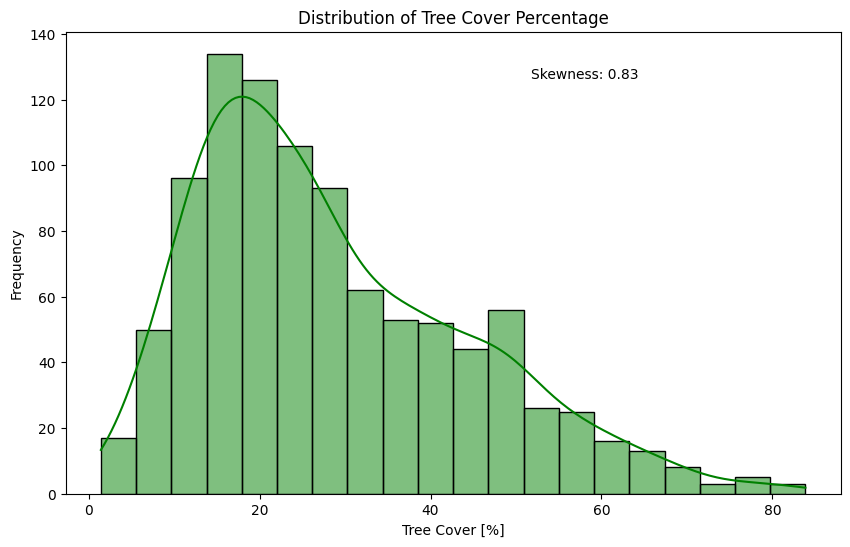

In [28]:
# prompt: make a diagram in which we see distribution of tree cover [%] in terms of frequency, add a distribution line & skewness

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the histogram with density curve
sns.histplot(df_green['Tree cover [%]'], kde=True, bins=20, color='green')

# Add labels and title
plt.xlabel('Tree Cover [%]')
plt.ylabel('Frequency')
plt.title('Distribution of Tree Cover Percentage')

# Calculate skewness
skewness = df_green['Tree cover [%]'].skew()
print(f"Skewness of Tree Cover Percentage: {skewness}")

# Add text annotation for skewness
plt.text(0.6, 0.9, f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()


1.** Boxplot Interpretation:**
Median: The orange line inside the box represents the median of the tree cover percentage, which seems to be just below 20%.
Mean: The red dot indicates the mean of the tree cover percentage, which is nearly the same as the median, suggesting a fairly symmetrical distribution but with a slight skew.
Interquartile Range (IQR): The green shaded box represents the IQR (25th to 75th percentile), showing that the middle 50% of the data points range approximately from 10% to around 35% tree cover. The width of the IQR indicates moderate variability in the data.
Whiskers (min/max): The whiskers extend to around 0% and 75%, marking the non-outlier minimum and maximum values, which suggests a large range in tree cover percentages.
Outliers: Several outliers are visible above 80%, indicating a few cities with exceptionally high tree cover percentages.

2. **Distribution Curve (Histogram) Interpretation:**
Distribution Shape: The data is right-skewed (positive skewness of 0.83), meaning that most of the cities have relatively low tree cover, with fewer cities having very high percentages.
Frequency Distribution: The histogram shows that the majority of cities have tree cover percentages in the 10-30% range. The frequency peaks around 20%, confirming that most areas have moderate tree coverage.
Tail Behavior: There’s a long tail towards the right, with cities having tree cover as high as 80%, but these are relatively rare as indicated by the declining frequencies at the upper end of the distribution.

**Key Insights:**
Moderate Tree Coverage: Most cities have moderate tree cover percentages, with the highest concentration around 20%. This suggests that tree cover is generally present in cities, but it's not extremely high.
Variation Across Cities: The data shows a significant amount of variability. Some cities have very low tree cover (close to 0%), while others have extensive coverage, reaching up to 80%.
Outliers: There are a few cities with very high tree cover, which are exceptions in the dataset. These outliers indicate unique cases where green spaces may dominate the landscape.
Implications for Urban Planning: The skewness suggests that increasing tree cover could be challenging in many cities where current levels are low. Focus could be on improving green spaces in cities where tree cover is particularly low (e.g., the lower quartile areas).
This analysis helps in understanding the current state of urban tree coverage and could guide future interventions to increase urban greenery where needed.



BIVARIATE ANALYSIS

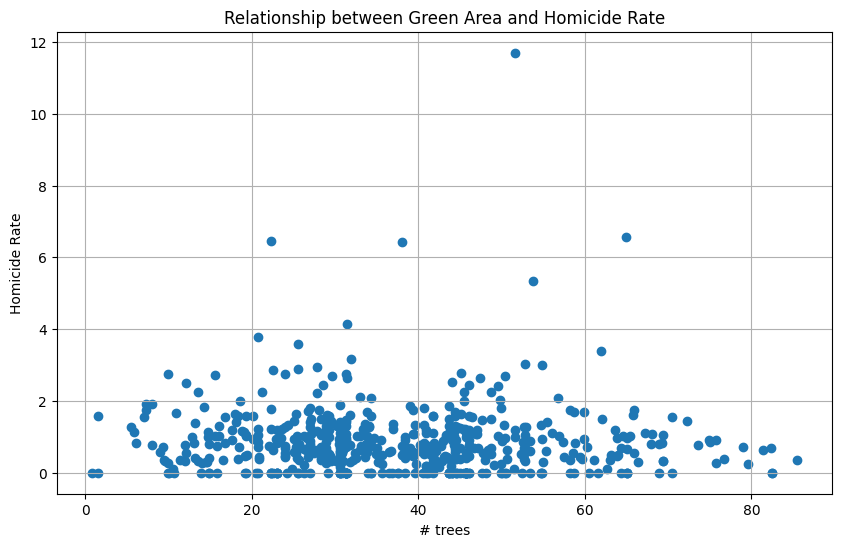

In [25]:
# prompt: plot green t.o.v.H_rate in df_merged

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merged has columns 'green_pc' and 'H_rate'

plt.figure(figsize=(10, 6))
plt.scatter(df_merged['green'], df_merged['H_RATE'])
plt.xlabel('# trees')
plt.ylabel('Homicide Rate')
plt.title('Relationship between Green Area and Homicide Rate')
plt.grid(True)
plt.show()


Intercept: 0.9276179820587662
Coefficient: [-0.00143986]
R-squared: 0.0005733986039324623


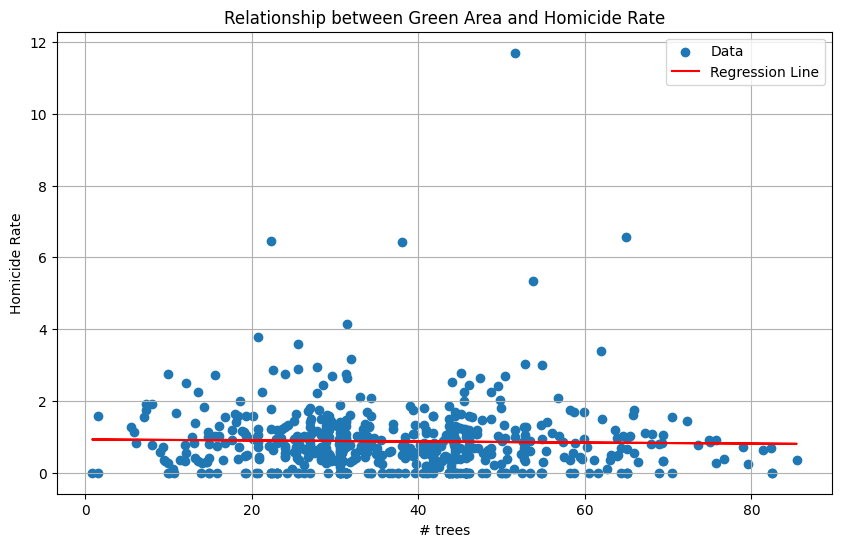

In [31]:
# prompt: plot #trees in function of homocide rate + add linear regression; show the output of the regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_merged has columns 'green_pc' and 'H_rate'

# Prepare data for regression
X = df_merged['green'].values.reshape(-1, 1)  # Independent variable (green area)
y = df_merged['H_RATE'].values  # Dependent variable (homicide rate)


# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the regression results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Calculate and print the R-squared value
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('# trees')
plt.ylabel('Homicide Rate')
plt.title('Relationship between Green Area and Homicide Rate')
plt.legend()
plt.grid(True)
plt.show()
